In [114]:
import pandas as pd 
df=pd.read_csv('Europe Hotel Booking Satisfaction Score.csv')

In [115]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


from collections import Counter

import warnings
warnings.filterwarnings('ignore')



from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import nltk
import tqdm


from sklearn.cluster import KMeans




from sklearn.metrics import classification_report



from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer, make_column_selector

from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import numpy as np
from sklearn.metrics import f1_score, make_scorer

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   id                              103904 non-null  int64 
 1   Gender                          103904 non-null  object
 2   Age                             103904 non-null  int64 
 3   purpose_of_travel               103904 non-null  object
 4   Type of Travel                  103904 non-null  object
 5   Type Of Booking                 103904 non-null  object
 6   Hotel wifi service              103904 non-null  int64 
 7   Departure/Arrival  convenience  103904 non-null  int64 
 8   Ease of Online booking          103904 non-null  int64 
 9   Hotel location                  103904 non-null  int64 
 10  Food and drink                  103904 non-null  int64 
 11  Stay comfort                    103904 non-null  int64 
 12  Common Room entertainment     

purpose_of_travel - цель путешествия: авиационная, учебная, личная, деловая, туристическая.

Type of Travel - тип путешествия: групповое путешествие, личное путешествие.

Type Of Booking - тип бронирования: групповое бронирование, индивидуальное/для пары.

Hotel wifi service - оценки по шкале от 1 до 5.

Departure/Arrival convenience - удобство отправления/прибытия: оценки по шкале от 1 до 5.

Ease of Online booking - удобство онлайн-бронирования: оценки по шкале от 1 до 5.

Hotel location - расположение отеля: оценки по шкале от 1 до 5.

Food and drink - еда и напитки: оценки по шкале от 1 до 5.

Stay comfort - комфорт проживания: оценки по шкале от 1 до 5.

Common Room entertainment - развлечения в общих помещениях: оценки по шкале от 1 до 5.

Checkin/Checkout service - сервис регистрации заезда/выезда: оценки по шкале от 1 до 5.

Other service - другие услуги: оценки по шкале от 1 до 5.

Cleanliness - чистота: оценки по шкале от 1 до 5.

satisfaction - удовлетворенность: довольный, нейтральный или недовольный.

In [117]:
df

,id,Gender,Age,purpose_of_travel,Type of Travel,Type Of Booking,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,satisfaction
0,70172,Male,13,aviation,Personal Travel,Not defined,3,4,3,1,5,5,5,4,5,5,neutral or dissatisfied
1,5047,Male,25,tourism,Group Travel,Group bookings,3,2,3,3,1,1,1,1,4,1,neutral or dissatisfied
2,110028,Female,26,tourism,Group Travel,Group bookings,2,2,2,2,5,5,5,4,4,5,satisfied
3,24026,Female,25,tourism,Group Travel,Group bookings,2,5,5,5,2,2,2,1,4,2,neutral or dissatisfied
4,119299,Male,61,aviation,Group Travel,Group bookings,3,3,3,3,4,5,3,3,3,3,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,Female,23,business,Group Travel,Individual/Couple,2,1,2,3,2,2,2,2,3,2,neutral or dissatisfied
103900,73097,Male,49,tourism,Group Travel,Group bookings,4,4,4,4,2,5,5,5,5,4,satisfied
103901,68825,Male,30,tourism,Group Travel,Group bookings,1,1,1,3,4,5,4,5,5,4,neutral or dissatisfied
103902,54173,Female,22,business,Group Travel,Individual/Couple,1,1,1,5,1,1,1,5,4,1,neutral or dissatisfied


In [118]:
df.columns

Index(['id', 'Gender', 'Age', 'purpose_of_travel', 'Type of Travel',
       'Type Of Booking', 'Hotel wifi service',
       'Departure/Arrival  convenience', 'Ease of Online booking',
       'Hotel location', 'Food and drink', 'Stay comfort',
       'Common Room entertainment', 'Checkin/Checkout service',
       'Other service', 'Cleanliness', 'satisfaction'],
      dtype='object')

In [119]:
df['Type Of Booking'].value_counts()

Group bookings       49665
Individual/Couple    46745
Not defined           7494
Name: Type Of Booking, dtype: int64

In [120]:
df=df[df['Type Of Booking']!='Not defined']
df

,id,Gender,Age,purpose_of_travel,Type of Travel,Type Of Booking,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,satisfaction
1,5047,Male,25,tourism,Group Travel,Group bookings,3,2,3,3,1,1,1,1,4,1,neutral or dissatisfied
2,110028,Female,26,tourism,Group Travel,Group bookings,2,2,2,2,5,5,5,4,4,5,satisfied
3,24026,Female,25,tourism,Group Travel,Group bookings,2,5,5,5,2,2,2,1,4,2,neutral or dissatisfied
4,119299,Male,61,aviation,Group Travel,Group bookings,3,3,3,3,4,5,3,3,3,3,satisfied
5,111157,Female,26,business,Personal Travel,Individual/Couple,3,4,2,1,1,1,1,4,4,1,neutral or dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,Female,23,business,Group Travel,Individual/Couple,2,1,2,3,2,2,2,2,3,2,neutral or dissatisfied
103900,73097,Male,49,tourism,Group Travel,Group bookings,4,4,4,4,2,5,5,5,5,4,satisfied
103901,68825,Male,30,tourism,Group Travel,Group bookings,1,1,1,3,4,5,4,5,5,4,neutral or dissatisfied
103902,54173,Female,22,business,Group Travel,Individual/Couple,1,1,1,5,1,1,1,5,4,1,neutral or dissatisfied


In [121]:
df=df.drop('id',axis=1)
target=['satisfaction']
numerical_features = [
    'Age','Hotel wifi service','Departure/Arrival  convenience','Ease of Online booking','Hotel location','Food and drink','Stay comfort','Common Room entertainment','Checkin/Checkout service','Other service','Cleanliness'
]  # Численные переменные

# Бинарные признаки
to_dummies = [
    'Type of Travel', 'Gender' ,'Type Of Booking',
]
# Категориальные признаки
categorical_features = [
    col for col in df.columns if col not in numerical_features + target + to_dummies
]
categorical_features=to_dummies+categorical_features
all_features = categorical_features + numerical_features

In [122]:
categorical_features

['Type of Travel', 'Gender', 'Type Of Booking', 'purpose_of_travel']

In [111]:
all_features

['purpose_of_travel',
 'Age',
 'Hotel wifi service',
 'Departure/Arrival  convenience',
 'Ease of Online booking',
 'Hotel location',
 'Food and drink',
 'Stay comfort',
 'Common Room entertainment',
 'Checkin/Checkout service',
 'Other service',
 'Cleanliness',
 'Type of Travel',
 'Gender',
 'Type Of Booking']

array([[<AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'Hotel wifi service'}>,
        <AxesSubplot: title={'center': 'Departure/Arrival  convenience'}>],
       [<AxesSubplot: title={'center': 'Ease of Online booking'}>,
        <AxesSubplot: title={'center': 'Hotel location'}>,
        <AxesSubplot: title={'center': 'Food and drink'}>],
       [<AxesSubplot: title={'center': 'Stay comfort'}>,
        <AxesSubplot: title={'center': 'Common Room entertainment'}>,
        <AxesSubplot: title={'center': 'Checkin/Checkout service'}>],
       [<AxesSubplot: title={'center': 'Other service'}>,
        <AxesSubplot: title={'center': 'Cleanliness'}>, <AxesSubplot: >]],
      dtype=object)

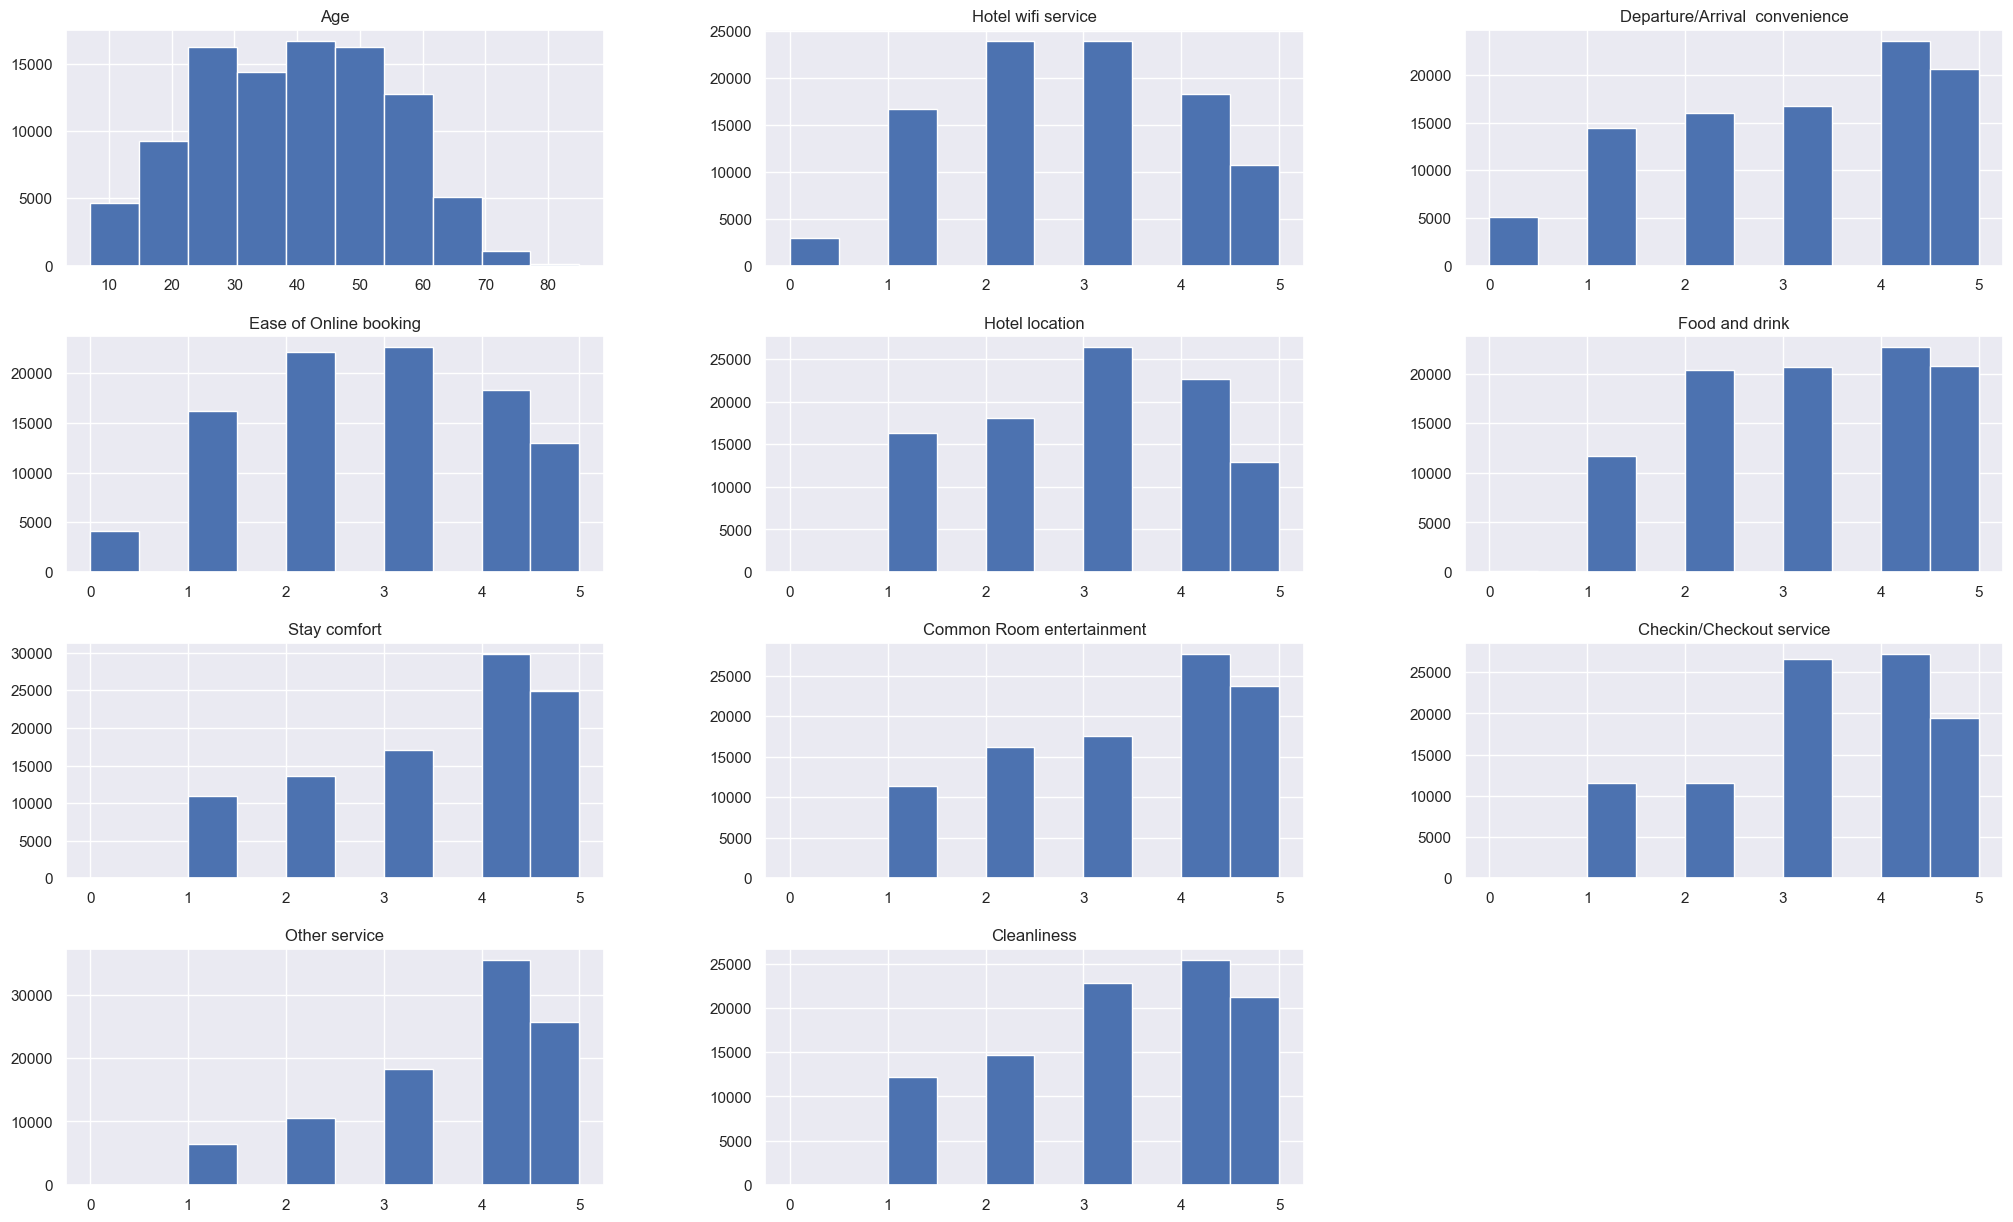

In [20]:
df.hist(figsize=(25, 15))


In [154]:
pip install category_encoders

     -------------------------------------- 81.9/81.9 kB 919.2 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [159]:
#   Для категориальных - применяем SimpleImputer, а затем StandardScaler
numerical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer()),
    ("scaler", StandardScaler()),
    ("fs", SelectKBest(score_func=f_classif, k='all')),
])

#   Для категориальных - применяем SimpleImputer, а затем OneHotEncoder
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy='most_frequent')),
    ("onehot", OneHotEncoder(handle_unknown="ignore")),
])

# Собираем воедино трансформеры для числовых и категориальных признаков
data_transformer = ColumnTransformer(transformers=[
    ("numerical", numerical_transformer, numerical_features),
    ("categorical", categorical_transformer, categorical_features),
])

# Создание конвейера препроцессора, который сначала преобразует данные
preprocessor = Pipeline(steps=[("data_transformer", data_transformer)])


In [7]:
df.columns

Index(['Gender', 'Age', 'purpose_of_travel', 'Type of Travel',
       'Type Of Booking', 'Hotel wifi service',
       'Departure/Arrival  convenience', 'Ease of Online booking',
       'Hotel location', 'Food and drink', 'Stay comfort',
       'Common Room entertainment', 'Checkin/Checkout service',
       'Other service', 'Cleanliness', 'satisfaction'],
      dtype='object')

In [124]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df[all_features + target], test_size=0.2, stratify=df[target])
print(df_train.shape, df_test.shape)

(77128, 16) (19282, 16)


In [91]:
preprocessor.fit_transform(df_train.drop(target, axis=1), df_train[target])

array([[ 0.77491669,  0.20189626, -1.34023764, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.50821593,  0.95426879,  0.62313961, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.04161745,  0.20189626,  0.62313961, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.97494226, -0.55047628, -0.68577856, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.77491669, -1.30284882, -1.34023764, ...,  1.        ,
         0.        ,  0.        ],
       [-0.22521117, -0.55047628, -0.68577856, ...,  1.        ,
         0.        ,  0.        ]])

In [125]:
df_train

,Type of Travel,Gender,Type Of Booking,purpose_of_travel,Age,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,satisfaction
64444,Group Travel,Male,Group bookings,academic,47,3,3,3,3,3,5,5,3,5,4,satisfied
409,Group Travel,Female,Individual/Couple,aviation,17,0,3,0,3,4,4,4,5,5,4,satisfied
85441,Group Travel,Female,Group bookings,tourism,30,1,1,1,1,5,5,5,5,5,5,satisfied
17833,Personal Travel,Female,Individual/Couple,tourism,21,0,4,0,2,5,5,5,3,2,5,satisfied
53003,Group Travel,Female,Group bookings,tourism,20,5,5,5,3,2,2,2,5,4,2,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76655,Group Travel,Male,Group bookings,tourism,42,2,2,2,2,2,4,5,4,5,3,satisfied
62643,Personal Travel,Female,Individual/Couple,aviation,8,4,3,2,4,4,4,4,3,4,4,neutral or dissatisfied
77148,Group Travel,Female,Individual/Couple,aviation,61,5,5,5,5,2,4,5,5,5,1,satisfied
1130,Group Travel,Male,Group bookings,academic,26,0,0,0,5,2,1,2,4,5,2,satisfied


In [126]:

classifier_pipline = Pipeline(
    steps=[("preprocessor", preprocessor), 
           ("classifier", LogisticRegression())])



f1 = make_scorer(f1_score, average="macro")
param_grid = {
    'classifier__C': np.logspace(-5, 2, 200), # np.linspace(-10, 10)
    'classifier__penalty': ['l1', 'l2'],
    'classifier__class_weight': ['balanced', None],
    'preprocessor__data_transformer__numerical__imputer__strategy':['median', 'mean']
}


search = GridSearchCV(classifier_pipline, param_grid, n_jobs=-1, cv=3) #, scoring=f1)

search.fit(df_train.drop(target, axis=1), df_train[target])

search.best_params_
search.best_score_

0.8417176689644372

In [128]:
best_params = search.best_params_
classifier_pipline.set_params(**best_params)

classifier_pipline.fit(df_train[all_features], df_train[target])

preds = classifier_pipline.predict(df_test[all_features])

print(classification_report(df_test[target], preds))

                         precision    recall  f1-score   support

neutral or dissatisfied       0.85      0.85      0.85     10646
              satisfied       0.82      0.82      0.82      8636

               accuracy                           0.84     19282
              macro avg       0.84      0.84      0.84     19282
           weighted avg       0.84      0.84      0.84     19282



In [53]:
df_train[all_features]

,purpose_of_travel,Age,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness
12607,tourism,60,1,4,1,1,5,5,4,4,4,5
53584,tourism,26,2,1,1,3,1,2,1,2,4,2
68986,personal,31,4,3,3,3,4,4,4,2,3,4
83397,aviation,24,2,2,2,2,3,3,3,1,2,3
23666,academic,23,1,1,1,1,4,1,4,3,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...
10819,tourism,37,1,1,4,1,2,5,5,5,5,4
60060,aviation,49,2,5,1,5,5,3,2,4,2,3
322,academic,29,2,2,2,2,5,2,5,2,3,5
72504,personal,20,2,5,2,4,3,3,3,4,5,3


In [129]:
 
classifier_pipline = Pipeline(
    steps=[("preprocessor", preprocessor), 
           ("classifier", RandomForestClassifier())])

param_grid = {
    'classifier__n_estimators': [100, 300,500],  
    'classifier__criterion': ['gini', 'entropy'] 
   
}
search = GridSearchCV(classifier_pipline, param_grid, n_jobs=-1, cv=3) #, scoring=f1)

search.fit(df_train.drop(target, axis=1), df_train[target])

print(
search.best_params_,
search.best_score_
)

{'classifier__criterion': 'gini', 'classifier__n_estimators': 300} 0.9461674150446381


In [130]:
best_params = search.best_params_
classifier_pipline.set_params(**best_params)

classifier_pipline.fit(df_train[all_features], df_train[target])


preds = classifier_pipline.predict(df_test[all_features])

print(classification_report(df_test[target], preds))

                         precision    recall  f1-score   support

neutral or dissatisfied       0.95      0.96      0.95     10646
              satisfied       0.95      0.94      0.94      8636

               accuracy                           0.95     19282
              macro avg       0.95      0.95      0.95     19282
           weighted avg       0.95      0.95      0.95     19282



In [131]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
import xgboost

clf1 = LogisticRegression(multi_class="multinomial", random_state=1)
clf2 = RandomForestClassifier(n_estimators=500, random_state=1)
clf3 = xgboost.XGBClassifier()

blending_classifier = VotingClassifier(
    estimators=[("log_regrassion", clf1), 
                ("random_forest", clf2), 
                ("xgb", clf3)] 
)
blending_classifier


blending_classifier_pipline = Pipeline(
    steps=[("preprocessor", preprocessor),
           ("classifier", blending_classifier)]
)

blending_classifier_pipline.fit(df_train[all_features], df_train[target])

preds = blending_classifier_pipline.predict(df_test[all_features])

print(classification_report(df_test[target], preds))

                         precision    recall  f1-score   support

neutral or dissatisfied       0.95      0.96      0.96     10646
              satisfied       0.95      0.94      0.94      8636

               accuracy                           0.95     19282
              macro avg       0.95      0.95      0.95     19282
           weighted avg       0.95      0.95      0.95     19282



In [34]:
blending_classifier

VotingClassifier(estimators=[('log_regrassion',
                              LogisticRegression(multi_class='multinomial',
                                                 random_state=1)),
                             ('random_forest',
                              RandomForestClassifier(n_estimators=500,
                                                     random_state=1)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_c...
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None, ...))])

In [132]:
from sklearn.decomposition import PCA
# Your code here.
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import StackingClassifier

# получим список эстиматоров
estimators = [
    ("SVM", make_pipeline(preprocessor, PCA(), LinearSVC())),
    ("Random_Forest", make_pipeline(preprocessor, RandomForestClassifier())),
    ("Xgboost", make_pipeline(preprocessor, xgboost.XGBClassifier())),
]

# построим классификатор используя стекинг и наш список классификаторов
stacking_classifier = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(n_jobs=-1, verbose=True),
    n_jobs=-1,
    verbose=True,
)

stacking_classifier



stacking_classifier.fit(df_train[all_features], df_train[target])

preds = stacking_classifier.predict(df_test[all_features])

print(classification_report(df_test[target], preds))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


                         precision    recall  f1-score   support

neutral or dissatisfied       0.95      0.96      0.96     10646
              satisfied       0.95      0.94      0.95      8636

               accuracy                           0.95     19282
              macro avg       0.95      0.95      0.95     19282
           weighted avg       0.95      0.95      0.95     19282



In [62]:
stacking_classifier

StackingClassifier(estimators=[('SVM',
                                Pipeline(steps=[('pipeline',
                                                 Pipeline(steps=[('data_transformer',
                                                                  ColumnTransformer(transformers=[('numerical',
                                                                                                   Pipeline(steps=[('imputer',
                                                                                                                    SimpleImputer()),
                                                                                                                   ('scaler',
                                                                                                                    StandardScaler()),
                                                                                                                   ('fs',
                                                                                                                    SelectKBest(k='all'))]),
                                                                                                   ['Age',
                                                                                                    'Hotel '
                                                                                                    'wifi '
                                                                                                    'service',
                                                                                                    'Departure/Arrival  '
                                                                                                    'convenience',
                                                                                                    'Ease '
                                                                                                    'of '
                                                                                                    'Online '
                                                                                                    'booking',
                                                                                                    'Hotel '
                                                                                                    'lo...
                                                               learning_rate=None,
                                                               max_bin=None,
                                                               max_cat_threshold=None,
                                                               max_cat_to_onehot=None,
                                                               max_delta_step=None,
                                                               max_depth=None,
                                                               max_leaves=None,
                                                               min_child_weight=None,
                                                               missing=nan,
                                                               monotone_constraints=None,
                                                               n_estimators=100,
                                                               n_jobs=None,
                                                               num_parallel_tree=None,
                                                               predictor=None,
                                                               random_state=None, ...))]))],
                   final_estimator=LogisticRegression(n_jobs=-1, verbose=True),
                   n_jobs=-1, verbose=True)

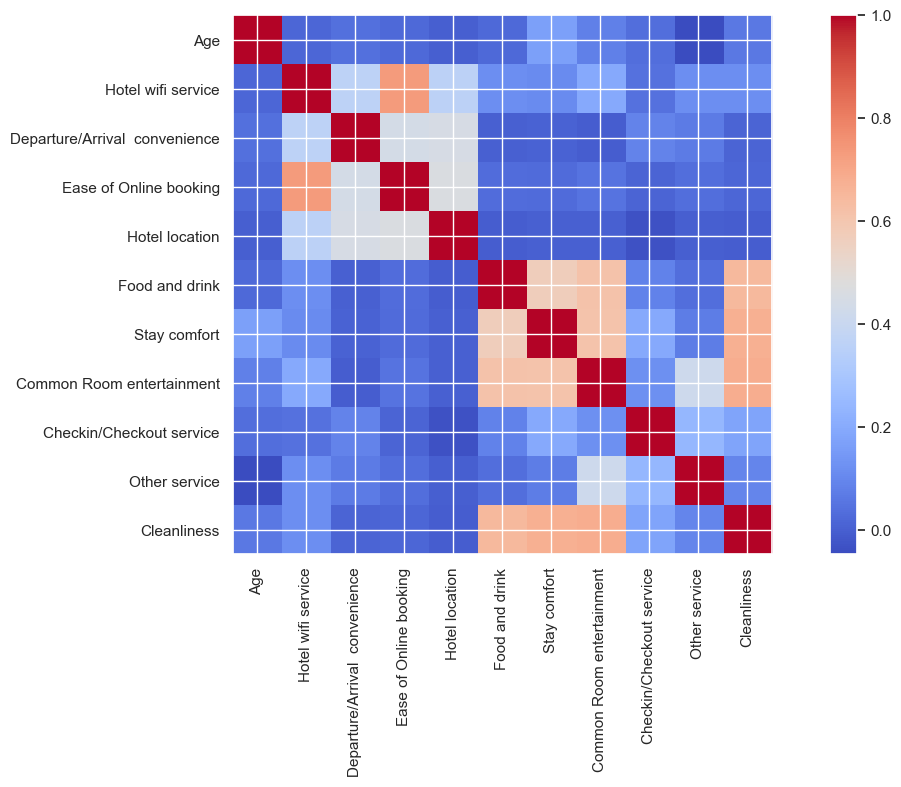

In [133]:
corr_matrix=df.corr()
plt.figure(figsize=(15, 7))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix)), corr_matrix.columns)
plt.show()

In [160]:
classifier_pipline = Pipeline(
    steps=[("preprocessor", preprocessor), 
           ("classifier", RandomForestClassifier())])
           

classifier_pipline.fit(df_train[all_features], df_train[target])

preds = classifier_pipline.predict(df_test[all_features])

print(classification_report(df_test[target], preds))

                         precision    recall  f1-score   support

neutral or dissatisfied       0.95      0.96      0.95     10646
              satisfied       0.95      0.93      0.94      8636

               accuracy                           0.95     19282
              macro avg       0.95      0.95      0.95     19282
           weighted avg       0.95      0.95      0.95     19282



In [143]:
model=classifier_pipline.named_steps['classifier']
model.feature_importances_

array([0.06812549, 0.18937397, 0.02979004, 0.05535189, 0.04108231,
       0.01704504, 0.06485322, 0.09035659, 0.04135873, 0.04724908,
       0.04299465, 0.0454982 , 0.05900234, 0.00460115, 0.00467513,
       0.09562501, 0.0796148 , 0.00524192, 0.00418357, 0.00501208,
       0.00340538, 0.00555939])

In [147]:
df_train[all_features]

,Type of Travel,Gender,Type Of Booking,purpose_of_travel,Age,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness
64444,Group Travel,Male,Group bookings,academic,47,3,3,3,3,3,5,5,3,5,4
409,Group Travel,Female,Individual/Couple,aviation,17,0,3,0,3,4,4,4,5,5,4
85441,Group Travel,Female,Group bookings,tourism,30,1,1,1,1,5,5,5,5,5,5
17833,Personal Travel,Female,Individual/Couple,tourism,21,0,4,0,2,5,5,5,3,2,5
53003,Group Travel,Female,Group bookings,tourism,20,5,5,5,3,2,2,2,5,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76655,Group Travel,Male,Group bookings,tourism,42,2,2,2,2,2,4,5,4,5,3
62643,Personal Travel,Female,Individual/Couple,aviation,8,4,3,2,4,4,4,4,3,4,4
77148,Group Travel,Female,Individual/Couple,aviation,61,5,5,5,5,2,4,5,5,5,1
1130,Group Travel,Male,Group bookings,academic,26,0,0,0,5,2,1,2,4,5,2


In [ ]:
pip install eli5

In [173]:
onehot_encoder = classifier_pipline.named_steps['preprocessor'].named_steps['data_transformer'].named_transformers_['categorical'].named_steps['onehot']
onehot_columns = onehot_encoder.get_feature_names_out(input_features=categorical_features)


In [174]:
numeric_features_list = list(numerical_features)
numeric_features_list.extend(onehot_columns)

In [175]:
import eli5

In [180]:
eli5.explain_weights(classifier_pipline.named_steps['classifier'], top=10, feature_names=numeric_features_list)

Weight,Feature
0.1844 ± 0.0610,Hotel wifi service
0.0921 ± 0.2122,Type Of Booking_Group bookings
0.0875 ± 0.1087,Common Room entertainment
0.0823 ± 0.1955,Type Of Booking_Individual/Couple
0.0714 ± 0.0873,Stay comfort
0.0679 ± 0.0181,Age
0.0560 ± 0.1405,Type of Travel_Group Travel
0.0544 ± 0.0322,Ease of Online booking
0.0525 ± 0.1383,Type of Travel_Personal Travel
0.0470 ± 0.0432,Other service
